# IESB - CIA035 - Aula 01 - Revisão

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-reviews/winemag-data_first150k.csv
/kaggle/input/wine-reviews/winemag-data-130k-v2.json
/kaggle/input/wine-reviews/winemag-data-130k-v2.csv


In [2]:
# Importando os dados
df = pd.read_csv('/kaggle/input/wine-reviews/winemag-data_first150k.csv')

# Verificando tamanho (linhas, colunas)
df.shape

(150930, 11)

In [3]:
# Verificando tipos e quantidades
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [4]:
# dando uma olhada nos dados
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [5]:
# Slice - corte no dataframe

# Pegar todos os dados de uma coluna
df['variety']

0         Cabernet Sauvignon
1              Tinta de Toro
2            Sauvignon Blanc
3                 Pinot Noir
4         Provence red blend
                 ...        
150925           White Blend
150926       Champagne Blend
150927           White Blend
150928       Champagne Blend
150929          Pinot Grigio
Name: variety, Length: 150930, dtype: object

In [6]:
# Quais as variedades mais comuns?
df['variety'].value_counts()

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
                            ...  
Petit Meslier                   1
Syrah-Bonarda                   1
Carignan-Syrah                  1
Rebula                          1
Dafni                           1
Name: variety, Length: 632, dtype: int64

In [7]:
# Variedades top 10
df['variety'].value_counts().head(10)

Chardonnay                  14482
Pinot Noir                  14291
Cabernet Sauvignon          12800
Red Blend                   10062
Bordeaux-style Red Blend     7347
Sauvignon Blanc              6320
Syrah                        5825
Riesling                     5524
Merlot                       5070
Zinfandel                    3799
Name: variety, dtype: int64

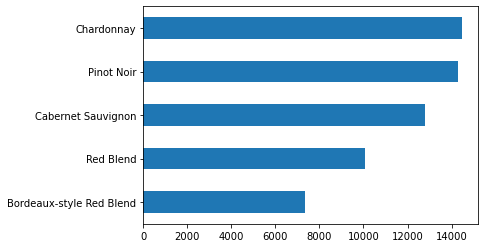

In [8]:
# Quais as variedades mais comuns? Em gráfico!
df['variety'].value_counts().head().sort_values(ascending=True).plot.barh()

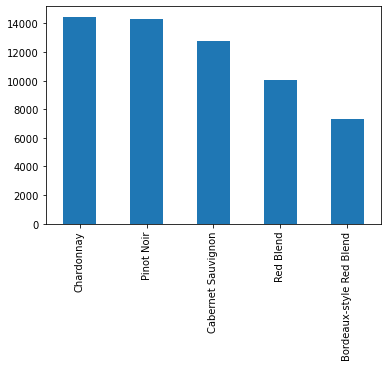

In [9]:
# Quais as variedades mais comuns? Em gráfico! Barra normal
df['variety'].value_counts().head().sort_values(ascending=False).plot.bar()

In [10]:
# Slice de duas (ou mais) colunas, precisamos passar uma lista
df[['country', 'province']]

,country,province
0,US,California
1,Spain,Northern Spain
2,US,California
3,US,Oregon
4,France,Provence
...,...,...
150925,Italy,Southern Italy
150926,France,Champagne
150927,Italy,Southern Italy
150928,France,Champagne


In [11]:
# Slice, selecionando linhas específicas
# Vinhos dos US
df[df['country'] == 'US']

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
8,8,US,This re-named vineyard was formerly bottled as...,Silice,95,65.0,Oregon,Chehalem Mountains,Willamette Valley,Pinot Noir,Bergström
9,9,US,The producer sources from two blocks of the vi...,Gap's Crown Vineyard,95,60.0,California,Sonoma Coast,Sonoma,Pinot Noir,Blue Farm
...,...,...,...,...,...,...,...,...,...,...,...
150892,150892,US,"A light, earthy wine, with violet, berry and t...",Coastal,82,10.0,California,California,California Other,Merlot,Callaway
150896,150896,US,"Some raspberry fruit in the aroma, but things ...",NaN,82,10.0,California,California,California Other,Pinot Noir,Camelot
150914,150914,US,"Old-gold in color, and thick and syrupy. The a...",Late Harvest Cluster Select,94,25.0,California,Anderson Valley,Mendocino/Lake Counties,White Riesling,Navarro
150915,150915,US,"Decades ago, Beringer’s then-winemaker Myron N...",Nightingale,93,30.0,California,North Coast,North Coast,White Blend,Beringer


In [12]:
# Slice, selecionando linhas específicas
# Vinhos dos US, do tipo Zinfandel
df[(df['country'] == 'US') & (df['variety'] == 'Zinfandel')]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
126,126,US,Renwood's tiny two-barrel production of its mo...,Grand Wren,90,100.0,California,Amador County,Sierra Foothills,Zinfandel,Renwood
136,136,US,A nose of sour cherry and cranberry meshes wit...,Mustang Springs,90,38.0,California,Adelaida District,Central Coast,Zinfandel,Peachy Canyon
146,146,US,"This is an exuberantly fruity, spicy and robus...",Estate Grown,90,36.0,California,Napa Valley,Napa,Zinfandel,Grgich Hills
186,186,US,This is a lush and powerful wine from a vineya...,French Camp Vineyard,88,38.0,California,Paso Robles,Central Coast,Zinfandel,Tobin James
187,187,US,Hailing from the recently designated Paso High...,French Camp Vineyard,88,38.0,California,Paso Robles,Central Coast,Zinfandel,Tobin James
...,...,...,...,...,...,...,...,...,...,...,...
150794,150794,US,"Spicy black fruit, with bell pepper, black pep...",Chiles Mill Vineyard,89,22.0,California,Napa Valley,Napa,Zinfandel,Green & Red
150812,150812,US,"Ripe, muscular wine, with a full throttle nose...",Reserve,88,25.0,California,Napa Valley,Napa,Zinfandel,Stonehedge
150873,150873,US,With a color akin to the soft pink of ripe pea...,White,83,7.0,California,Amador County,Sierra Foothills,Zinfandel,Montevina
150875,150875,US,"From the folks who invented white Zinfandel, a...",NaN,83,6.0,California,California,California Other,Zinfandel,Sutter Home


In [13]:
# Slice, selecionando linhas específicas
# Qual a maior pontuação de vinhos dos US, do tipo Zinfandel?
df[(df['country'] == 'US') & (df['variety'] == 'Zinfandel')]['points'].max()

96

In [14]:
# Slice, selecionando linhas específicas
# Qual o vinho dos US, do tipo Zinfandel, com maior pontuação?
df_us_zin = df[(df['country'] == 'US') & (df['variety'] == 'Zinfandel')]

df_us_zin[df_us_zin['points'] == df_us_zin['points'].max()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
63763,63763,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford
107803,107803,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford
130753,130753,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford


In [15]:
# Qual o vinho dos US, do tipo Zinfandel, com maior pontuação?
df_us_zin.nlargest(1, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
63763,63763,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford


In [16]:
# Os 5 vinhos dos US, do tipo Zinfandel, com maior pontuação?
df_us_zin.nlargest(10, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
63763,63763,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford
107803,107803,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford
130753,130753,US,"The vineyard is in Fulton, a cool part of the ...",Highwire Vineyard,96,55.0,California,Russian River Valley,Sonoma,Zinfandel,Hartford
6025,6025,US,"Even by past standards, this new vintage of Si...",Old Vine,95,39.0,Oregon,Columbia Gorge (OR),Oregon Other,Zinfandel,Sineann
11854,11854,US,From a vineyard east of Napa first planted in ...,R.W. Moore Vineyard,95,50.0,California,Coombsville,Napa,Zinfandel,Robert Biale
19374,19374,US,"The vineyard is on winding, picturesque West D...",Beeson Ranch,95,34.0,California,Dry Creek Valley,Sonoma,Zinfandel,Dry Creek Vineyard
26679,26679,US,A joy to drink. It's so ripely exuberant in fr...,Cortina,95,38.0,California,Dry Creek Valley,Sonoma,Zinfandel,Seghesio
38943,38943,US,From a vineyard east of Napa first planted in ...,R.W. Moore Vineyard,95,50.0,California,Coombsville,Napa,Zinfandel,Robert Biale
47210,47210,US,This is great Zinfandel. The vineyard was plan...,Crow Ridge Vineyard,95,33.0,California,Russian River Valley,Sonoma,Zinfandel,V. Sattui
47212,47212,US,"An impressive Zinfandel, notable for its compl...",Old Vine Estate,95,36.0,California,Dry Creek Valley,Sonoma,Zinfandel,Zichichi Family Vineyard


In [17]:
# Os 5 vinhos dos US, do tipo Zinfandel, com menor pontuação?
df_us_zin.nsmallest(5, 'points')

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
26294,26294,US,Syrupy and tired. Not much going on with this ...,NaN,80,20.0,California,Sonoma County,Sonoma,Zinfandel,Headbanger
33050,33050,US,"Way too high in alcohol, giving it the ripe, h...",Reserve,80,44.0,California,Paso Robles,Central Coast,Zinfandel,Opolo
34640,34640,US,"Hard to like, with vegetal and sugared raspber...",NaN,80,13.0,California,California,California Other,Zinfandel,Forbidden Zin
42797,42797,US,"This Zinfandel is alcoholic, and it's dominate...",Los Chamizal Vineyard,80,28.0,California,Sonoma Valley,Sonoma,Zinfandel,Tin Barn
47128,47128,US,"In a giant-sized 750 ml bottle, this Zin is fl...",Ancient Vine,80,25.0,California,Lodi,Central Valley,Zinfandel,Moss Roxx
